In [1]:
import random
import sys

import numpy as np
import matplotlib.pyplot as plt
from itertools import compress

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim_4_level, exciton_sim_4_lvl_full_exchange

Loading BokehJS ...

In [2]:
def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def human_sorting(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    float regex comes from https://stackoverflow.com/a/12643073/190597
    '''
    return [ atof(c) for c in re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", text) ]

In [3]:
import os
files = os.listdir('../sim_output/')
files = [r'../sim_output/' + f
         for f in files if '2020-04-2'
         in f if f.endswith('.h5')]

In [4]:
import re
def natural_key(string_):
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]
files = sorted(files, key=natural_key)
files = sorted(files, key= human_sorting)

In [5]:
kin_const = []

In [6]:
CNT_sims = [CNTSimFile(i, kin_const) for i in files]

../CNT-SIM/CNTSimFile.py:30: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.


In [7]:
for i in CNT_sims:
    print(i)

../sim_output/2020-04-26_exciton_sim_4_level-def_1.h5
../sim_output/2020-04-26_exciton_sim_4_level-len_1.h5
../sim_output/2020-04-26_exciton_sim_4_level-def_2.h5
../sim_output/2020-04-26_exciton_sim_4_level-len_2.h5
../sim_output/2020-04-26_exciton_sim_4_level-def_3.h5
../sim_output/2020-04-26_exciton_sim_4_level-len_3.h5
../sim_output/2020-04-26_exciton_sim_4_level-def_4.h5
../sim_output/2020-04-26_exciton_sim_4_level-len_4.h5
../sim_output/2020-04-26_exciton_sim_4_level-def_5.h5
../sim_output/2020-04-26_exciton_sim_4_level-len_5.h5
../sim_output/2020-04-26_exciton_sim_4_level-def_6.h5
../sim_output/2020-04-26_exciton_sim_4_level-len_6.h5
../sim_output/2020-04-26_exciton_sim_4_level-def_7.h5
../sim_output/2020-04-26_exciton_sim_4_level-len_7.h5
../sim_output/2020-04-24_exciton_sim_4_level-def_1.h5
../sim_output/2020-04-24_exciton_sim_4_level-len_1.h5
../sim_output/2020-04-24_exciton_sim_4_level-def_2.h5
../sim_output/2020-04-24_exciton_sim_4_level-len_2.h5
../sim_output/2020-04-24_exc

In [8]:
for i in CNT_sims:
    print(i.kin_const[5], i.kin_const[0])

100000000000.0 20000000000.0
100000000000.0 20000000000.0
10000000000.0 20000000000.0
10000000000.0 20000000000.0
50000000000.0 15000000000.0
50000000000.0 15000000000.0
500000000000.0 15000000000.0
500000000000.0 15000000000.0
100000000000.0 15000000000.0
100000000000.0 15000000000.0
10000000000.0 15000000000.0
10000000000.0 15000000000.0
25000000000.0 15000000000.0
25000000000.0 15000000000.0
50000000000.0 20000000000.0
50000000000.0 20000000000.0
500000000000.0 20000000000.0
500000000000.0 20000000000.0
5000000000.0 20000000000.0
5000000000.0 20000000000.0
25000000000.0 20000000000.0
25000000000.0 20000000000.0


In [9]:
mask_high_er = [True if i.kin_const[0]==20000000000.0 else False for i in CNT_sims]

## Defect Dependence

In [10]:
color_list = np.array(['blue', 'orange', 'green', 'red', 'black', 'magenta', 'navy',  'darkviolet', 'cyan'])

In [40]:
def k_ed_sorting(CNTFile):
    return CNTFile.kin_const[5]

In [41]:
defects_k_ed = sorted(list(compress(CNT_sims, mask_high_er))[::2], key=k_ed_sorting)

### E11*

In [42]:
plot = figure(title='Defect Density Relation, l = 300 nm', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(defects_k_ed):
    plot.line(sim.calc_dict['n_defects'], sim.QY[:, 0]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}',
              color=color_list[i])
plot.xaxis.axis_label = 'N (defects)'
plot.yaxis.axis_label = 'QY (E11*)'
show(plot)

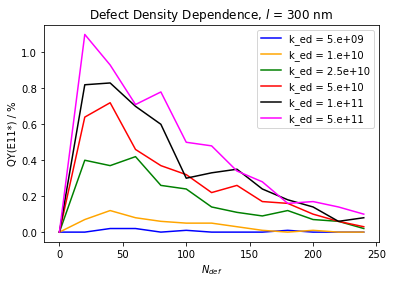

In [43]:
# plt.axvline(40, alpha=0.5, color='black')
for i, sim in enumerate(defects_k_ed):
    plt.plot(sim.calc_dict['n_defects'], sim.QY[:, 0]*100,
              label=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}',
              color=color_list[i])
plt.legend()
plt.xlabel('$N_{def}$')
plt.ylabel('QY(E11*) / %')
plt.title('Defect Density Dependence, $l$ = 300 nm')
plt.savefig('../../tmp/2020-04-26_exciton_sim_4_level-QY-defectstate-defect-dependence.png', dpi=500)

### E11

In [44]:
plot = figure(title='Defect Density Relation, l = 300 nm', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(defects_k_ed):
    plot.line(sim.calc_dict['n_defects'], sim.QY[:, 1]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}', color=color_list[i])
plot.xaxis.axis_label = 'N (defects)'
plot.yaxis.axis_label = 'QY (E11)'
show(plot)

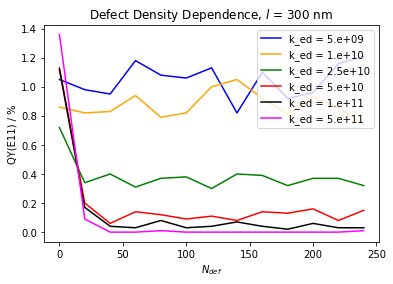

In [45]:
# plt.axvline(40, alpha=0.5, color='black')
for i, sim in enumerate(defects_k_ed):
    plt.plot(sim.calc_dict['n_defects'], sim.QY[:, 1]*100,
              label=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}', color=color_list[i])
plt.legend()
plt.xlabel('$N_{def}$')
plt.ylabel('QY(E11) / %')
plt.title('Defect Density Dependence, $l$ = 300 nm')
plt.savefig('../../tmp/2020-04-26_exciton_sim_4_level-QY-E11-defect-dependence.png', dpi=500)

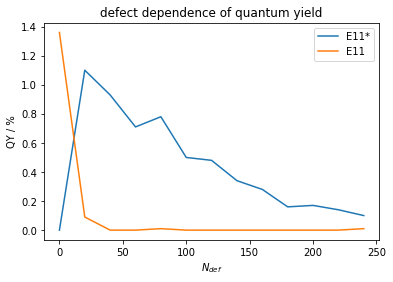

In [59]:
i = 5
plt.plot(defects_k_ed[i].calc_dict['n_defects'], defects_k_ed[i].QY[:, 0]*100,
         label='E11*')
plt.plot(defects_k_ed[i].calc_dict['n_defects'], defects_k_ed[i].QY[:, 1]*100,
         label='E11')
plt.legend()
plt.title('defect dependence of quantum yield')
plt.xlabel('$N_{def}$')
plt.ylabel('QY / %')
plt.savefig('../../tmp/2020-04-26_exciton_sim_4_level-QY-defect-dependence-comparisson.png', dpi=500)

## Length dependence

### E11*

In [17]:
length_k_ed = sorted(list(compress(CNT_sims, mask_high_er))[1::2], key=k_ed_sorting)

In [18]:
plot = figure(title='Length Density Relation', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(length_k_ed):
    plot.line(sim.calc_dict['CNT_length'], sim.QY[:, 0]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}',
              color=color_list[i])
plot.xaxis.axis_label = 'l / nm'
plot.yaxis.axis_label = 'QY (E11*)'
show(plot)

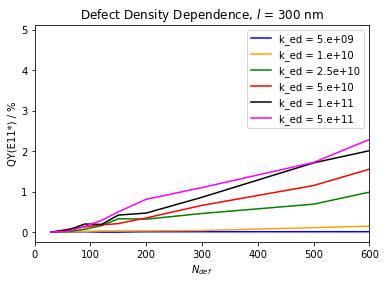

In [19]:
#plt.axvline(40, alpha=0.5, color='black')
for i, sim in enumerate(length_k_ed):
    plt.plot(sim.calc_dict['CNT_length'], sim.QY[:, 0]*100,
              label=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}',
              color=color_list[i])
plt.xlim(0,600)
plt.legend()
plt.xlabel('$N_{def}$')
plt.ylabel('QY(E11*) / %')
plt.title('Defect Density Dependence, $l$ = 300 nm')
plt.savefig('../../tmp/2020-04-26_exciton_sim_4_level-QY-excitedstate-defect-dependence.png', dpi=500)

### E11

In [20]:
plot = figure(title='Length Density Relation,', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(length_k_ed):
    plot.line(sim.calc_dict['CNT_length'], sim.QY[:, 1]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}',
              color=color_list[i])
plot.xaxis.axis_label = 'l / nm'
plot.yaxis.axis_label = 'QY (E11)'
show(plot)

# Vary radiative decay

In [21]:
for i in sorted(CNT_sims, key=k_ed_sorting)[2::2]:
    print(i, i.kin_const[5], i.kin_const[0])

../sim_output/2020-04-26_exciton_sim_4_level-def_2.h5 10000000000.0 20000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-def_6.h5 10000000000.0 15000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-def_7.h5 25000000000.0 15000000000.0
../sim_output/2020-04-24_exciton_sim_4_level-def_4.h5 25000000000.0 20000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-def_3.h5 50000000000.0 15000000000.0
../sim_output/2020-04-24_exciton_sim_4_level-def_1.h5 50000000000.0 20000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-def_1.h5 100000000000.0 20000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-def_5.h5 100000000000.0 15000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-def_4.h5 500000000000.0 15000000000.0
../sim_output/2020-04-24_exciton_sim_4_level-def_2.h5 500000000000.0 20000000000.0


In [22]:
colors = np.array(['indigo', 'darkorchid', 'navy', 'skyblue', 'darkred', 'tomato',
                    'forestgreen', 'lawngreen', 'orange', 'yellow'])

In [23]:
defect_depen = sorted(CNT_sims, key=k_ed_sorting)[2::2]

In [24]:
plot = figure(title='Defect Density Relation, l = 300 nm', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(defect_depen):
    plot.line(sim.calc_dict['n_defects'], sim.QY[:, 0]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}',
              color=colors[i])
plot.xaxis.axis_label = 'N (defects)'
plot.yaxis.axis_label = 'QY (E11*)'
show(plot)

Darker color: k_er & k_dr 2E10, lighter color: 1.5E10

In [25]:
plot = figure(title='Defect Density Relation, l = 300 nm', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(defect_depen):
    plot.line(sim.calc_dict['n_defects'], sim.QY[:, 1]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}', color=colors[i])
plot.xaxis.axis_label = 'N (defects)'
plot.yaxis.axis_label = 'QY (E11)'
show(plot)

# n_defects = 40 (Defect alle 7.5 nm)
Using lime green line as 'default'

In [26]:
I11s_0 = defect_depen[7].QY[2, 0]*100
I11_0 = defect_depen[7].QY[2, 1]*100

In [27]:
mask_lower_er = [False if i.kin_const[0]==20000000000.0 else True for i in CNT_sims]

In [28]:
defects_k_ed = sorted(list(compress(CNT_sims, mask_lower_er)), key=k_ed_sorting)

In [29]:
for i in defects_k_ed[2:-4:2]:
    print(i, i.kin_const[5], i.kin_const[0])

../sim_output/2020-04-26_exciton_sim_4_level-def_7.h5 25000000000.0 15000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-def_3.h5 50000000000.0 15000000000.0


In [30]:
sim_transmission_11s = [sim.QY[2, 0]*100/I11s_0 for sim in defects_k_ed[:-2:2]]
sim_transmission_11 = [sim.QY[2, 1]*100/I11_0 for sim in defects_k_ed[:-2:2]]
k_const_for_plot = [sim.kin_const[5] for sim in defects_k_ed[:-2:2]]

In [31]:
#plt.plot(k_const_for_plot, sim_transmission_11s, label='Transmission E11*')
#plt.plot(k_const_for_plot, sim_transmission_11, label='Transmission E11')
#plt.legend()

# N = 20, defect every  15 nm
using tomato line as default

In [32]:
I11s_0 = defect_depen[5].QY[1, 0]*100
I11_0 = defect_depen[5].QY[1, 1]*100

In [33]:
sim_transmission_11s = [sim.QY[1, 0]*100/I11s_0 for sim in defects_k_ed[2:-4:2]]
sim_transmission_11 = [sim.QY[1, 1]*100/I11s_0 for sim in defects_k_ed[2:-4:2]]
k_const_for_plot = [sim.kin_const[5] for sim in defects_k_ed[2:-4:2]]

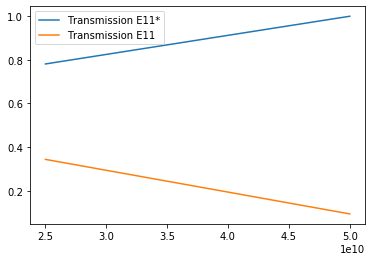

In [34]:
plt.plot(k_const_for_plot, sim_transmission_11s, label='Transmission E11*')
plt.plot(k_const_for_plot, sim_transmission_11, label='Transmission E11')
plt.legend()

## Length

In [35]:
for i in sorted(CNT_sims, key=k_ed_sorting)[3::2]:
    print(i, i.kin_const[5], i.kin_const[0])

../sim_output/2020-04-26_exciton_sim_4_level-len_2.h5 10000000000.0 20000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-len_6.h5 10000000000.0 15000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-len_7.h5 25000000000.0 15000000000.0
../sim_output/2020-04-24_exciton_sim_4_level-len_4.h5 25000000000.0 20000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-len_3.h5 50000000000.0 15000000000.0
../sim_output/2020-04-24_exciton_sim_4_level-len_1.h5 50000000000.0 20000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-len_1.h5 100000000000.0 20000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-len_5.h5 100000000000.0 15000000000.0
../sim_output/2020-04-26_exciton_sim_4_level-len_4.h5 500000000000.0 15000000000.0
../sim_output/2020-04-24_exciton_sim_4_level-len_2.h5 500000000000.0 20000000000.0


In [36]:
len_depen = sorted(CNT_sims, key=k_ed_sorting)[3::2]

In [37]:
plot = figure(title='Defect Density Relation, l = 300 nm', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(len_depen):
    plot.line(sim.calc_dict['n_defects'], sim.QY[:, 0]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}',
              color=colors[i])
plot.xaxis.axis_label = 'N (defects)'
plot.yaxis.axis_label = 'QY (E11*)'
show(plot)

In [38]:
plot = figure(title='Defect Density Relation, l = 300 nm', width=800, height=400)
plot.add_tools(HoverTool())
for i, sim in enumerate(len_depen):
    plot.line(sim.calc_dict['n_defects'], sim.QY[:, 1]*100,
              legend=f'k_ed = {np.format_float_scientific(sim.kin_const[5])}', color=colors[i])
plot.xaxis.axis_label = 'N (defects)'
plot.yaxis.axis_label = 'QY (E11)'
show(plot)